In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('D://DataScience//Material//EDA//Faculty notes Day 3//Faculty Notes//master.csv')

In [12]:
df.head()
df.describe()
df.columns
df.shape
df.dtypes.value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [19]:
#For finding missing values
df.isnull().sum()
#For showing in ascending values
df.isnull().sum().sort_values(ascending=False)

HDI for year          19456
generation                0
gdp_per_capita ($)        0
 gdp_for_year ($)         0
country-year              0
suicides/100k pop         0
population                0
suicides_no               0
age                       0
sex                       0
year                      0
country                   0
dtype: int64

In [21]:
df.population.describe()
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [27]:
pd.crosstab(index =df.age,columns='count')

col_0,count
age,
15-24 years,4642
25-34 years,4642
35-54 years,4642
5-14 years,4610
55-74 years,4642
75+ years,4642


<AxesSubplot:xlabel='country'>

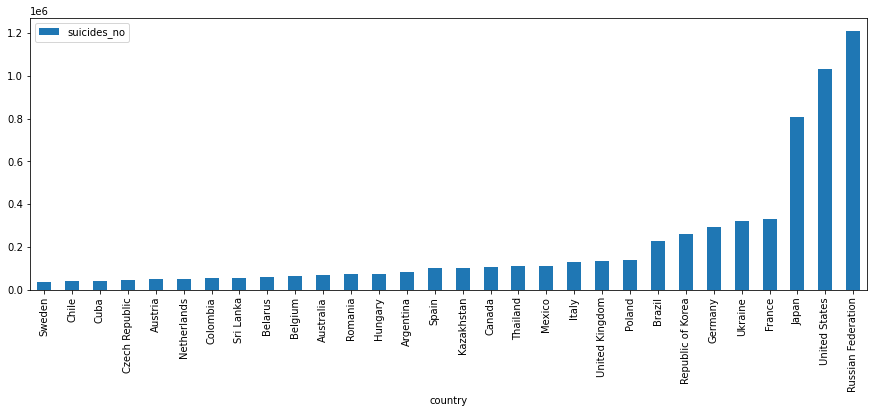

In [47]:
df.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no'],ascending=True).tail(30).plot(x='country',y='suicides_no',kind='bar',figsize=(15,5))

<AxesSubplot:xlabel='country'>

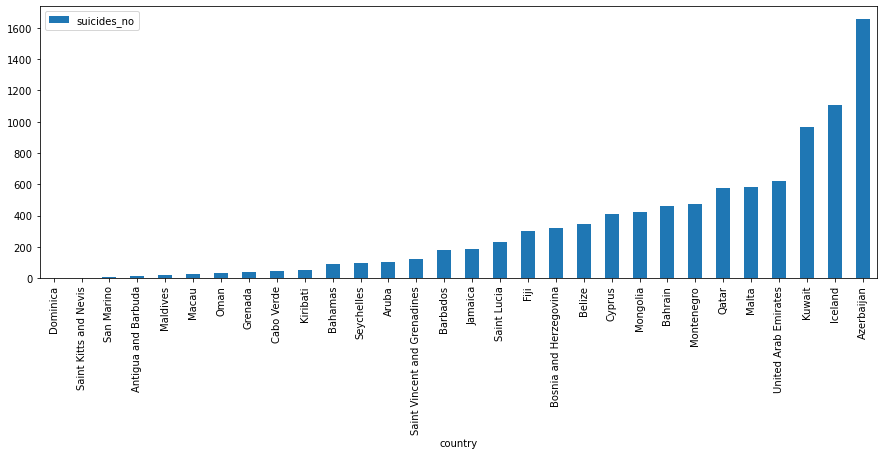

In [49]:
df.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no'],ascending=True).head(30).plot(x='country',y='suicides_no',kind='bar',figsize=(15,5))

<AxesSubplot:xlabel='age', ylabel='suicides_no'>

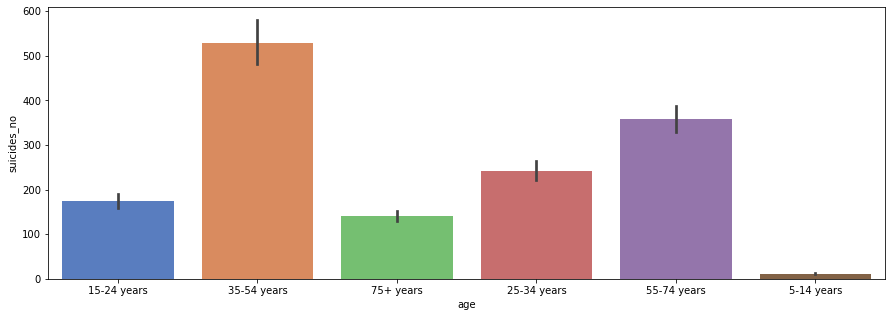

In [55]:
#plt.bar(x='suicides_no',y='age',data=df)
plt.figure(figsize=(15,5))
sns.barplot(y=df['suicides_no'],x=df['age'],palette='muted')

<AxesSubplot:xlabel='sex', ylabel='suicides_no'>

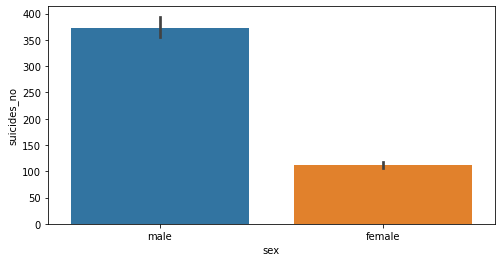

In [58]:
plt.figure(figsize=(8,4))
sns.barplot(y=df['suicides_no'],x=df['sex'])

<AxesSubplot:xlabel='population', ylabel='suicides_no'>

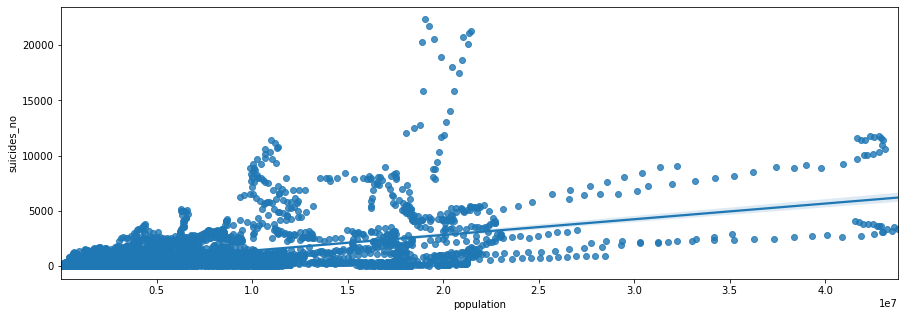

In [61]:
plt.figure(figsize=(15,5))
#sns.scatterplot(y=df['suicides_no'],x=df['population'])
sns.regplot(y=df['suicides_no'],x=df['population'])

<AxesSubplot:xlabel='sex', ylabel='suicides_no'>

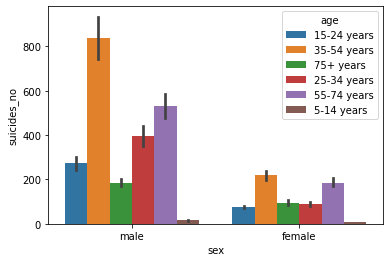

In [63]:
sns.barplot(x=df['sex'],y=df['suicides_no'],hue=df['age'])

In [77]:
diff_data=df['suicides_no'].groupby([df['country'],df['age']]).sum()
diff_data = diff_data.reset_index().sort_index(by='suicides_no',ascending=False)
diff_data.head()
#sns.barplot(y=diff_data['suicides_no'],x=diff_data['country'],hue=diff_data['sex'],palette='Set2')

TypeError: sort_index() got an unexpected keyword argument 'by'

<AxesSubplot:xlabel='country', ylabel='suicides_no'>

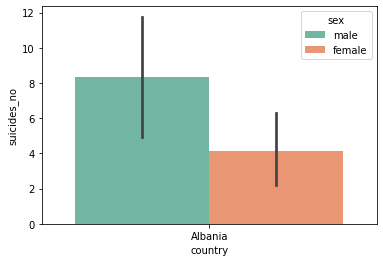

In [81]:
sns.barplot(y='suicides_no',x='country',hue='sex',data=df.head(30),palette='Set2')